In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [4]:
# Load Dataset
df = pd.read_csv("anemia.csv")

In [5]:
# Display basic info and first few rows
print("Dataset Info:")
df.info()
print("\nFirst 5 rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Number       500 non-null    int64  
 1   Sex          500 non-null    int64  
 2   Red Pixel    500 non-null    float64
 3   Green pixel  500 non-null    float64
 4   Blue pixel   500 non-null    float64
 5   Hb           500 non-null    float64
 6   Anaemic      500 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 27.5+ KB

First 5 rows:
   Number  Sex  Red Pixel  Green pixel  Blue pixel        Hb Anaemic
0       1    1  43.170845    30.945626   25.921971  6.252659     Yes
1       2    0  43.163481    30.306974   26.759843  8.578865     Yes
2       3    0  46.269997    27.315656   26.028556  9.640936     Yes
3       4    0  45.054787    30.469816   24.460797  4.794217     Yes
4       5    1  45.061884    31.218572   24.071714  8.865329     Yes


In [5]:
# Summary Statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
           Number         Sex   Red Pixel  Green pixel  Blue pixel          Hb
count  500.000000  500.000000  500.000000   500.000000  500.000000  500.000000
mean   250.500000    0.458000   45.030260    29.392138   25.576149   10.938374
std    144.481833    0.498732    2.777042     1.585042    1.917043    2.767554
min      1.000000    0.000000   38.626133    25.023080   19.495306    4.000000
25%    125.750000    0.000000   43.199936    28.311988   24.877544    9.061067
50%    250.500000    0.000000   44.906648    29.534431   25.982361   10.018786
75%    375.250000    1.000000   46.357891    30.582852   26.754657   13.092756
max    500.000000    1.000000   54.776064    32.526455   29.956341   16.508313


In [6]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Number         0
Sex            0
Red Pixel      0
Green pixel    0
Blue pixel     0
Hb             0
Anaemic        0
dtype: int64


In [7]:
# Handling Missing Values (Filling with Median)
df.fillna(df.median(numeric_only=True), inplace=True)

In [8]:
# central tendency
numeric_columns = ['Red Pixel', 'Green pixel', 'Blue pixel']
for col in numeric_columns:
  mean_val = df[col].mean()
  median_val = df[col].median()
  mode_val = df[col].mode()[0]
  print(f'{col} - Mean: {mean_val}, Median: {median_val}, Mode: {mode_val}')

Red Pixel - Mean: 45.030259826347404, Median: 44.9066476272468, Mode: 38.6261329570866
Green pixel - Mean: 29.392138410509084, Median: 29.53443070007225, Mode: 25.0230800550747
Blue pixel - Mean: 25.576149447901297, Median: 25.98236061580755, Mode: 19.4953061928788


In [9]:
# Calculate dispersion measures
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_columns:
    std_val = df[col].std()
    var_val = df[col].var()
    range_val = df[col].max() - df[col].min()
    iqr_val = df[col].quantile(0.75) - df[col].quantile(0.25)
    print(f'{col} - Standard Deviation: {std_val}, Variance: {var_val}, Range: {range_val}, IQR: {iqr_val}')

Number - Standard Deviation: 144.4818327679989, Variance: 20875.0, Range: 499, IQR: 249.5
Sex - Standard Deviation: 0.4987318587516419, Variance: 0.2487334669338677, Range: 1, IQR: 1.0
Red Pixel - Standard Deviation: 2.777042433763981, Variance: 7.711964678925773, Range: 16.1499308722005, IQR: 3.1579551253816476
Green pixel - Standard Deviation: 1.5850421239838988, Variance: 2.512358534803389, Range: 7.5033753234245, IQR: 2.270863965617476
Blue pixel - Standard Deviation: 1.9170428473056917, Variance: 3.6750532784059136, Range: 10.4610348978123, IQR: 1.8771134606562505
Hb - Standard Deviation: 2.7675535244029574, Variance: 7.65935251043523, Range: 12.508313115815401, IQR: 4.031689220395238


Number - Skewness: 0.0, Kurtosis: -1.2000096000384002
Sex - Skewness: 0.16859585914731062, Kurtosis: -1.97157543627838
Red Pixel - Skewness: 0.6820870710749227, Kurtosis: 1.0284430307603767
Green pixel - Skewness: -0.3055582583592782, Kurtosis: -0.4429229031203432
Blue pixel - Skewness: -1.1157803995922455, Kurtosis: 1.555207274044836
Hb - Skewness: -0.20189141739877134, Kurtosis: -0.37355126726841137


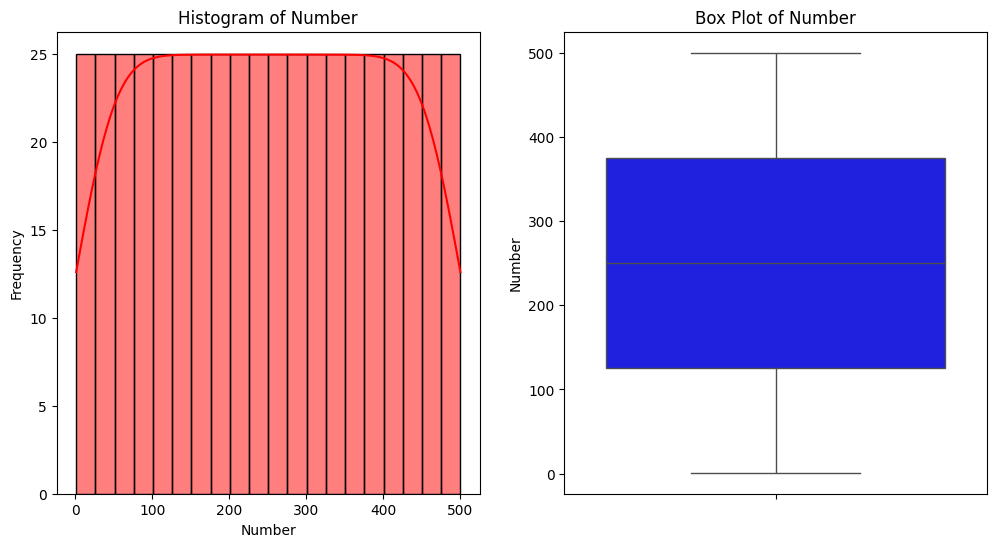

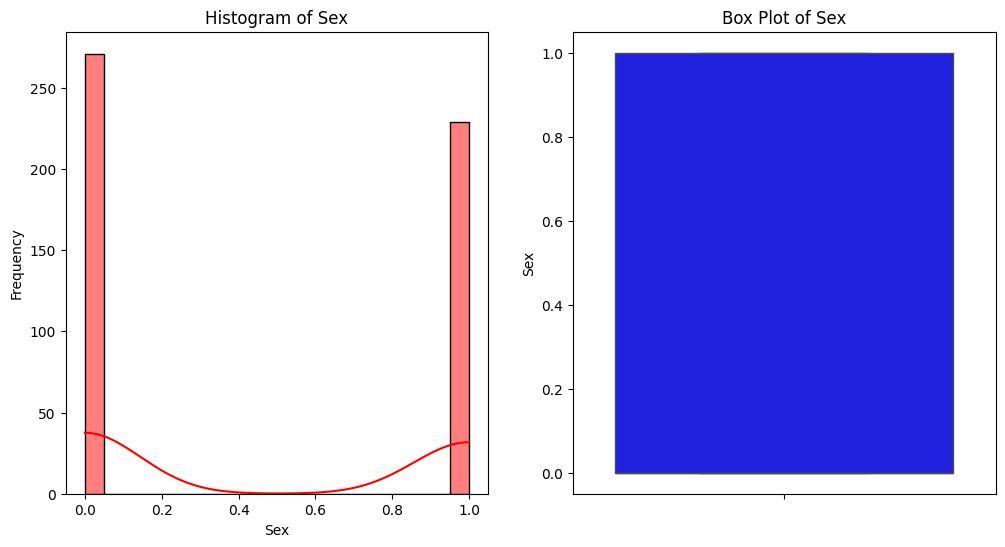

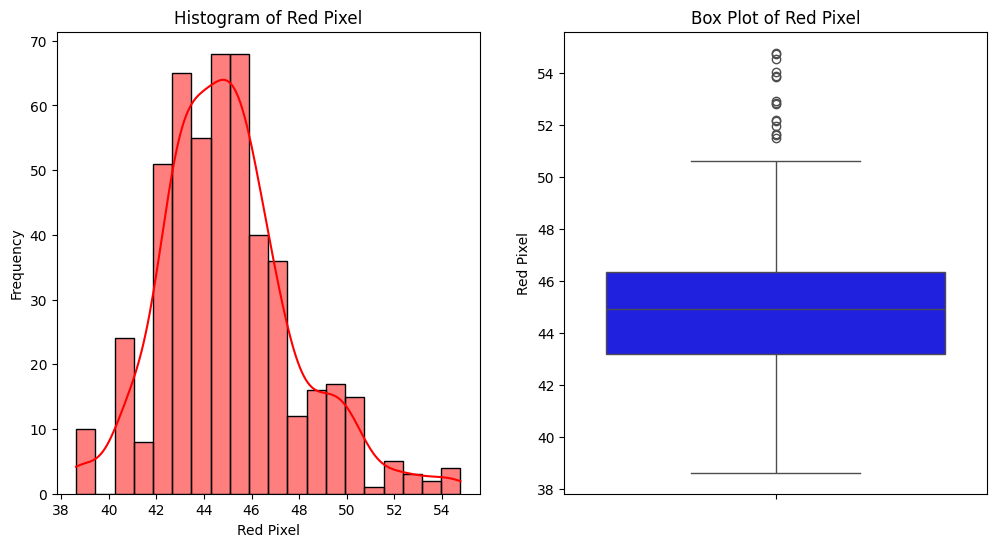

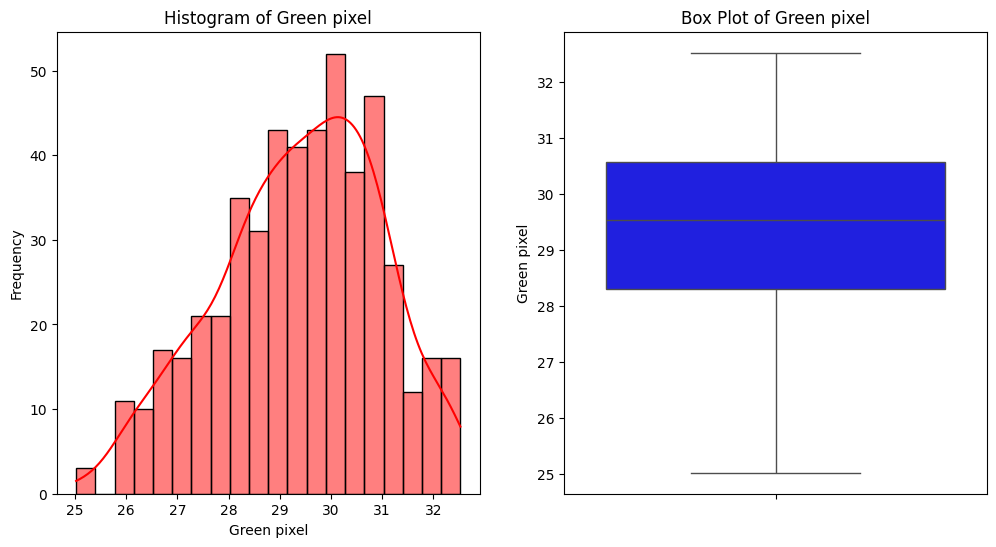

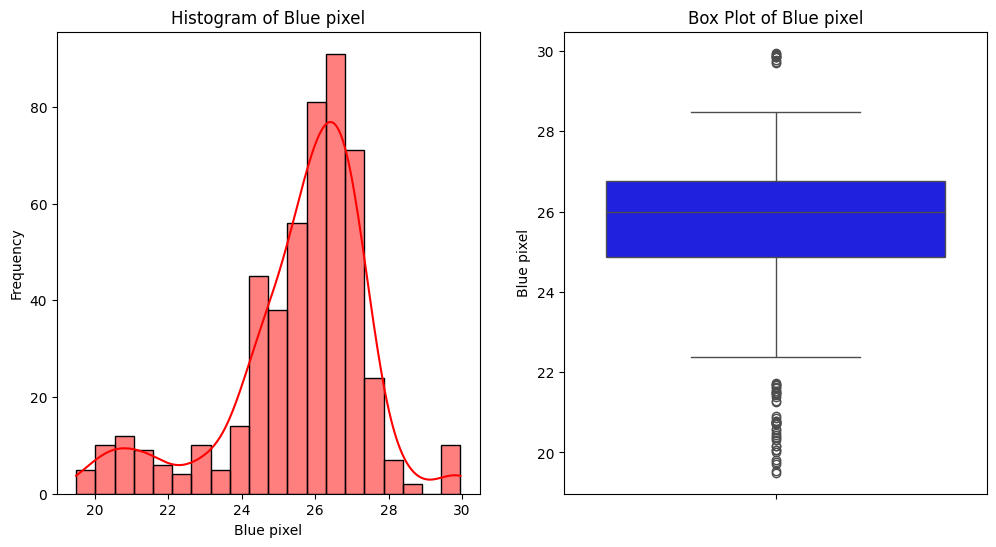

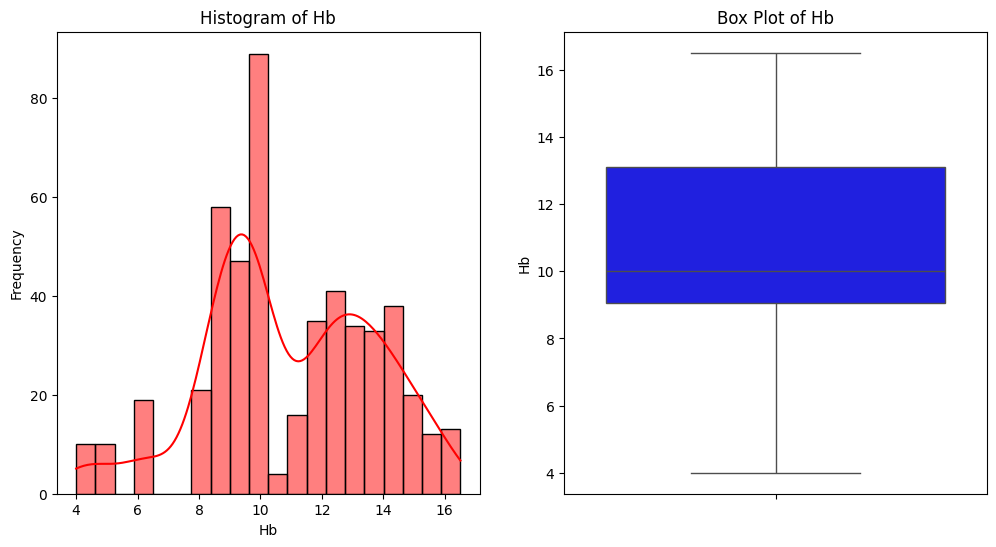

In [10]:
# Compute Skewness and Kurtosis
from scipy.stats import skew, kurtosis
for col in numeric_columns:
    skew_val = skew(df[col])
    kurt_val = kurtosis(df[col])
    print(f'{col} - Skewness: {skew_val}, Kurtosis: {kurt_val}')
import matplotlib.pyplot as plt
# Histogram and Box Plot for each numeric column
for col in numeric_columns:
    plt.figure(figsize=(12, 6))
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=20, color='red')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    # Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col], color='blue')
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()

In [11]:
# missing
print("Initial Dataset Shape:", df.shape)
print("Missing Values Before Handling:\n", df.isnull().sum())
# Handle missing values by filling with default label
df.fillna({'Labels': 'Unknown'}, inplace=True)
# df.fillna({'Labels': 'Unknown', 'ID': 0}, inplace=True)  # 'Labels' -> 'Unknown', 'ID' -> 0
print("Missing Values After Handling:\n", df.isnull().sum())
df.describe()

Initial Dataset Shape: (500, 7)
Missing Values Before Handling:
 Number         0
Sex            0
Red Pixel      0
Green pixel    0
Blue pixel     0
Hb             0
Anaemic        0
dtype: int64
Missing Values After Handling:
 Number         0
Sex            0
Red Pixel      0
Green pixel    0
Blue pixel     0
Hb             0
Anaemic        0
dtype: int64


,Number,Sex,Red Pixel,Green pixel,Blue pixel,Hb
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,0.458000,45.030260,29.392138,25.576149,10.938374
std,144.481833,0.498732,2.777042,1.585042,1.917043,2.767554
min,1.000000,0.000000,38.626133,25.023080,19.495306,4.000000
25%,125.750000,0.000000,43.199936,28.311988,24.877544,9.061067
50%,250.500000,0.000000,44.906648,29.534431,25.982361,10.018786
75%,375.250000,1.000000,46.357891,30.582852,26.754657,13.092756
max,500.000000,1.000000,54.776064,32.526455,29.956341,16.508313


In [12]:
# Encoding categorical variable 'Anaemic' as binary
df['Anaemic'] = df['Anaemic'].map({'Yes': 1, 'No': 0})
# df['Sex'] = df['Sex'].map({'M': 1, 'F': 0})
print(df.head())

   Number  Sex  Red Pixel  Green pixel  Blue pixel        Hb  Anaemic
0       1    1  43.170845    30.945626   25.921971  6.252659        1
1       2    0  43.163481    30.306974   26.759843  8.578865        1
2       3    0  46.269997    27.315656   26.028556  9.640936        1
3       4    0  45.054787    30.469816   24.460797  4.794217        1
4       5    1  45.061884    31.218572   24.071714  8.865329        1


In [13]:
# Drop any rows with missing values
df = df.dropna()
# Compute correlation and covariance matrices
correlation_matrix =df.corr(numeric_only=True)
covariance_matrix =df.cov(numeric_only=True)
# Print the correlation and covariance matrices
print("Correlation Matrix:\n",correlation_matrix)
print("\nCovariance Matrix:\n",covariance_matrix)

Correlation Matrix:
                Number       Sex  Red Pixel  ...  Blue pixel        Hb   Anaemic
Number       1.000000  0.064425   0.161322  ...   -0.039351  0.317982 -0.381828
Sex          0.064425  1.000000   0.081217  ...    0.003653  0.211251 -0.220780
Red Pixel    0.161322  0.081217   1.000000  ...   -0.835231  0.446670 -0.401631
Green pixel -0.240564 -0.147124  -0.746730  ...    0.262989 -0.684738  0.630851
Blue pixel  -0.039351  0.003653  -0.835231  ...    1.000000 -0.084008  0.062864
Hb           0.317982  0.211251   0.446670  ...   -0.084008  1.000000 -0.839851
Anaemic     -0.381828 -0.220780  -0.401631  ...    0.062864 -0.839851  1.000000

[7 rows x 7 columns]

Covariance Matrix:
                    Number       Sex  ...          Hb    Anaemic
Number       20875.000000  4.642285  ...  127.148801 -27.611222
Sex              4.642285  0.248733  ...    0.291583  -0.055110
Red Pixel       64.727432  0.112486  ...    3.432930  -0.558232
Green pixel    -55.091562 -0.116303  ...

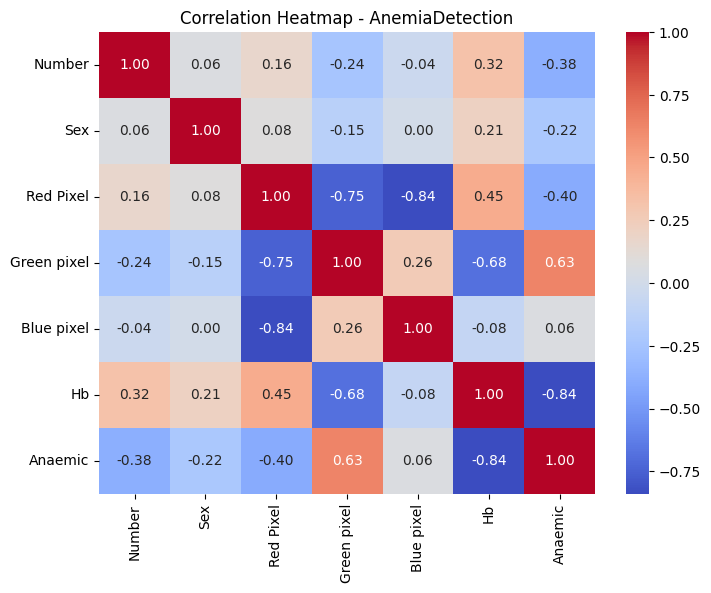

In [14]:
# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True, cmap="coolwarm",fmt=".2f")
plt.title("Correlation Heatmap - AnemiaDetection")
plt.show()

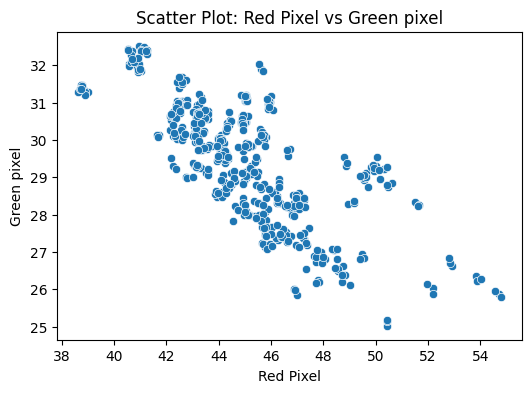

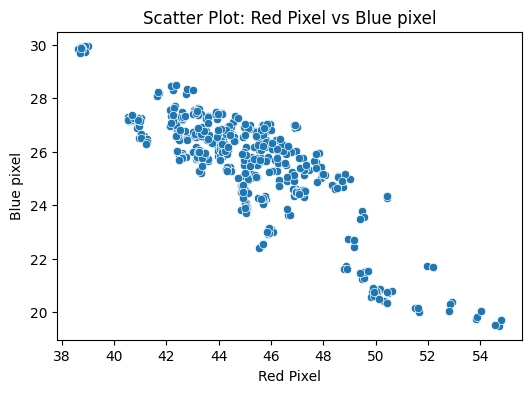

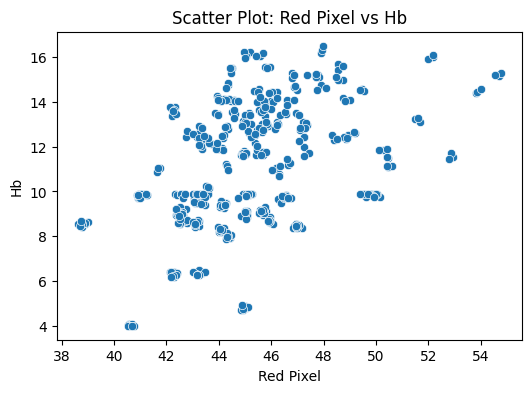

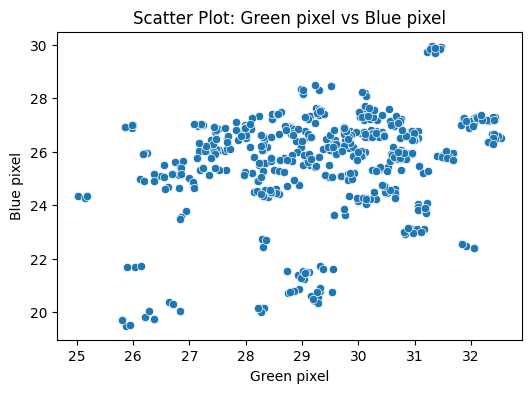

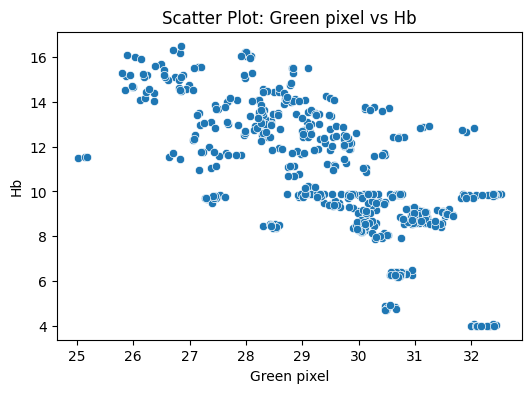

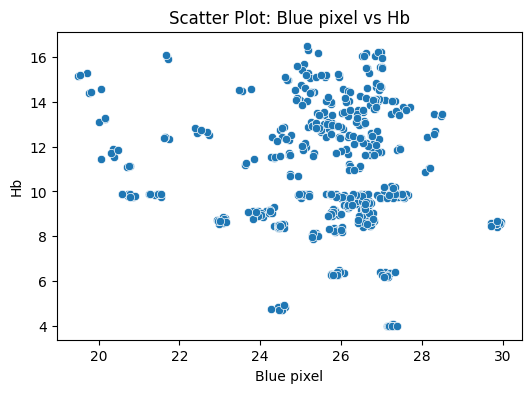

In [15]:
# plotting scatter plots
variables = ["Red Pixel", "Green pixel","Blue pixel", "Hb"]
for i in range(len(variables)):
  for j in range(i+1, len(variables)):
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[variables[i]],y=df[variables[j]])
    plt.xlabel(variables[i])
    plt.ylabel(variables[j])
    plt.title(f"Scatter Plot: {variables[i]} vs {variables[j]}")
    plt.show()

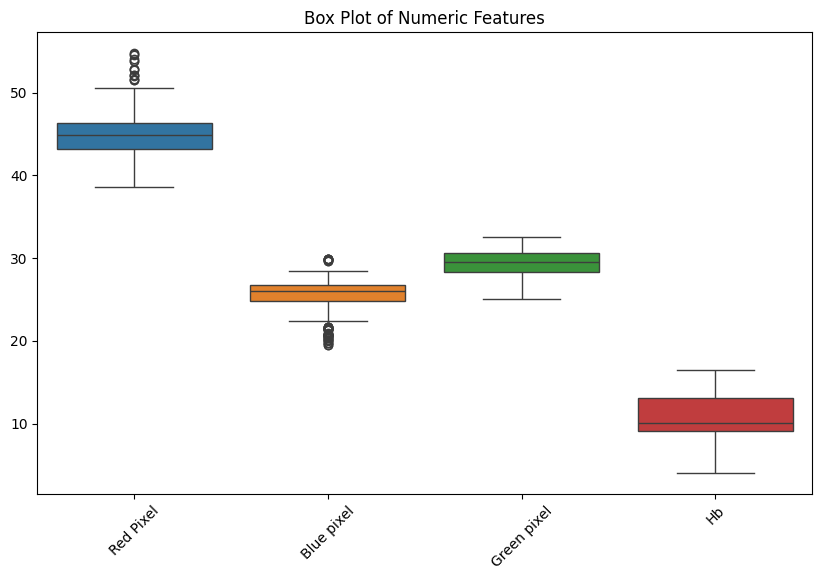

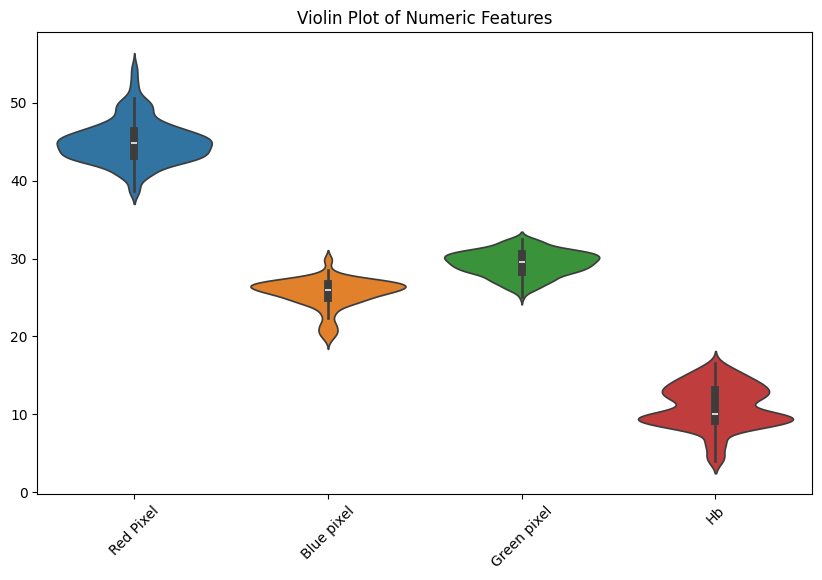

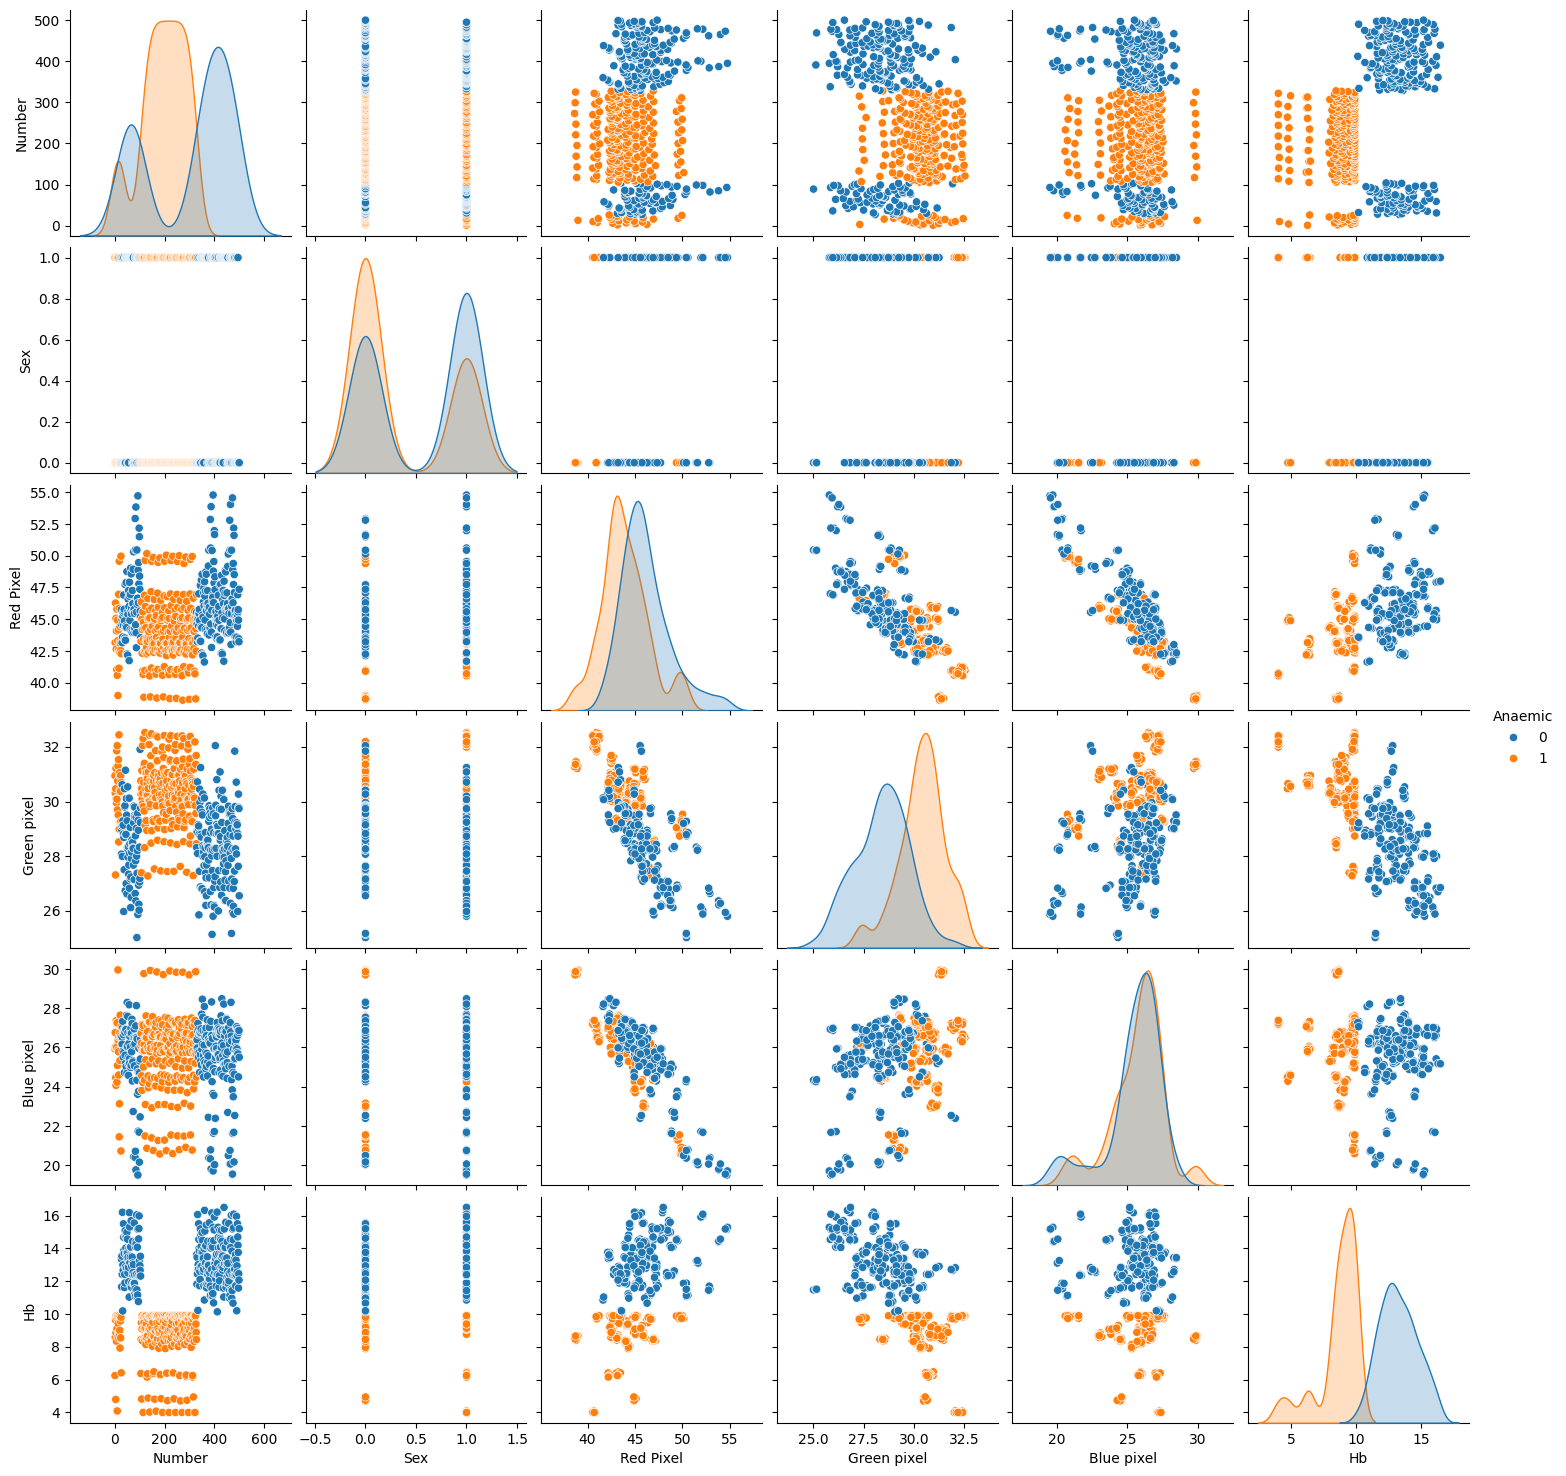

In [16]:
# Data Visualization (Box Plot, Violin Plot, Scatter Plot, Pair Plot)
numeric_columns = ['Red Pixel', 'Blue pixel', 'Green pixel','Hb']

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_columns])
plt.title("Box Plot of Numeric Features")
plt.xticks(rotation=45)
plt.show()

# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df[numeric_columns])
plt.title("Violin Plot of Numeric Features")
plt.xticks(rotation=45)
plt.show()

# Pair Plot
sns.pairplot(df, hue="Anaemic")
plt.show()

In [18]:
# Selecting relevant features and target variable
X = df[["Sex", "Red Pixel", "Green pixel", "Blue pixel"]]
y = df["Anaemic"]
print(Counter(y))

Counter({1: 250, 0: 250})


In [19]:
# Balancing Dataset
oversampler = SMOTE(random_state=42)
undersampler = RandomUnderSampler(random_state=42)

In [20]:
# Choose one method (oversampling or undersampling)
X_bal, y_bal = oversampler.fit_resample(X, y)  # Oversampling
# X_bal, y_bal = undersampler.fit_resample(X, y)  # Undersampling
print(Counter(y_bal))

Counter({1: 250, 0: 250})


In [21]:
# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Normalize the feature values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Logistic Regression Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.65      0.77        63
           1       0.61      0.92      0.73        37

    accuracy                           0.75       100
   macro avg       0.77      0.78      0.75       100
weighted avg       0.81      0.75      0.75       100



<Figure size 800x600 with 0 Axes>

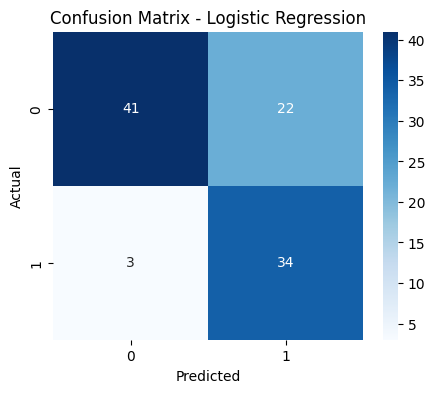

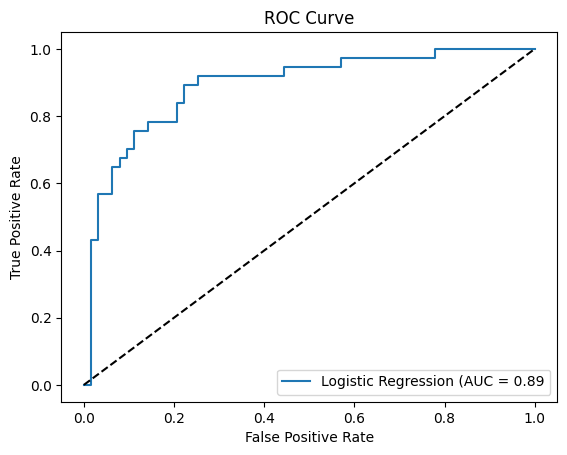

Decision Tree Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.86      0.89        63
           1       0.79      0.89      0.84        37

    accuracy                           0.87       100
   macro avg       0.86      0.87      0.86       100
weighted avg       0.88      0.87      0.87       100



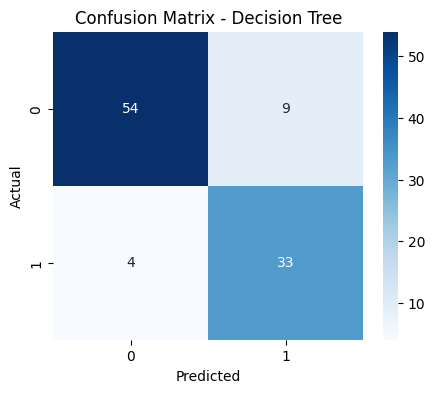

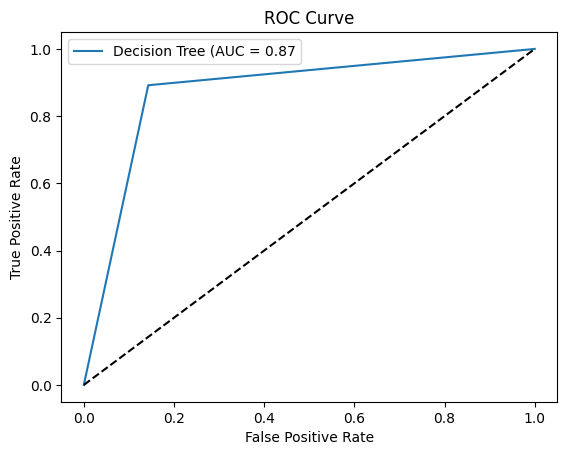

Random Forest Accuracy: 0.92
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93        63
           1       0.84      0.97      0.90        37

    accuracy                           0.92       100
   macro avg       0.91      0.93      0.92       100
weighted avg       0.93      0.92      0.92       100



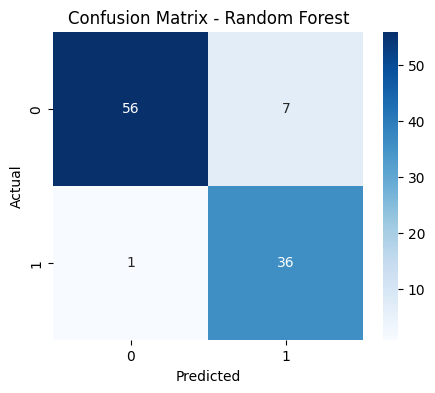

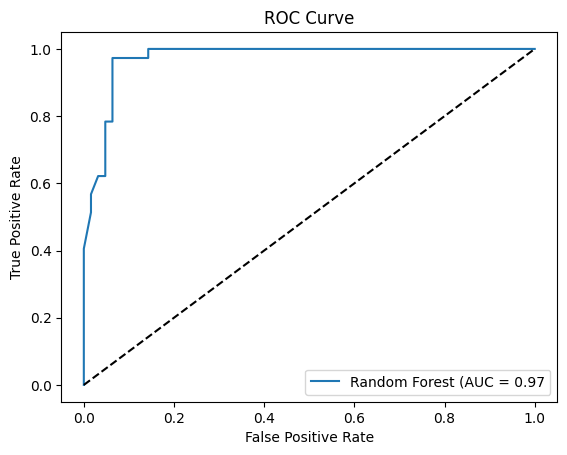

SVM Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.73      0.83        63
           1       0.67      0.95      0.79        37

    accuracy                           0.81       100
   macro avg       0.82      0.84      0.81       100
weighted avg       0.85      0.81      0.81       100



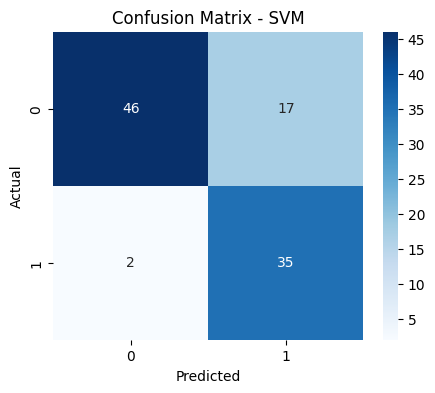

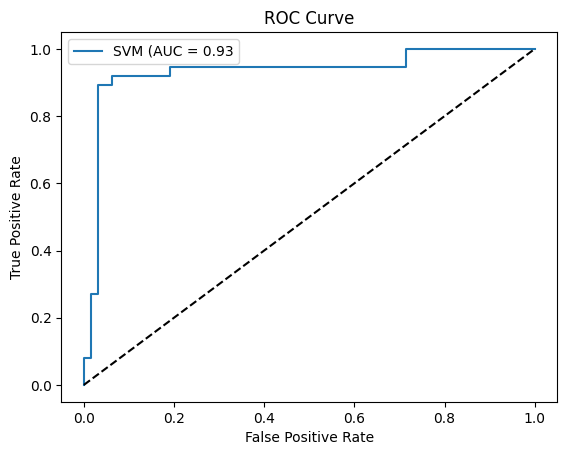

KNN Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.78      0.88        63
           1       0.73      1.00      0.84        37

    accuracy                           0.86       100
   macro avg       0.86      0.89      0.86       100
weighted avg       0.90      0.86      0.86       100



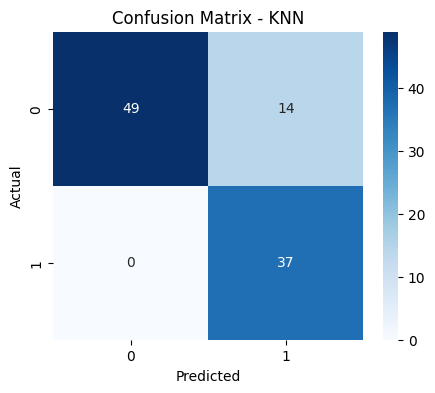

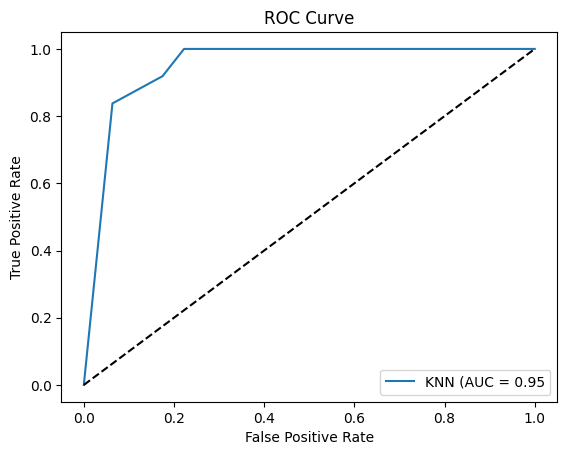

In [23]:
models = {
  "Logistic Regression": LogisticRegression(),
  "Decision Tree": DecisionTreeClassifier(),
  "Random Forest": RandomForestClassifier(),
  "SVM": SVC(probability=True),
  "KNN": KNeighborsClassifier()
}
plt.figure(figsize=(8, 6))
for name, model in models.items():
  model.fit(X_train_scaled, y_train)
  y_pred = model.predict(X_test_scaled)
  y_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None
  print(f"{name} Accuracy:", accuracy_score(y_test, y_pred))
  print("Classification Report:\n", classification_report(y_test, y_pred))
  # Confusion Matrix
  cm = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(5, 4))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title(f'Confusion Matrix - {name}')
  plt.show()

  if y_prob is not None:
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f}')
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend()
  plt.show()